Kruskal-Wallis

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## "Existe diferença significativa entre os modelos em relação a sua acurácia?"
<lu>
<li>H0: Todos os modelos possuem médias relativamente iguais em termos de acurácia de classificação</li>
<li>H1: Pelo menos uma modelo é diferente dos outros em termos de média de acurácia de classificação</li>
</lu>

In [2]:
language = "portugues"    
#language = "english"  
MIN_P_VALUE = 0.05

def show_result(media, std, column, shapiro_stats, shapiro_p_value):
    result = False
    if language == "english":
        print(f"Model: {column}")
        print("The mean of the data is = " + str(media))    
        print("The standard deviation of the data is = " + str(std))    
        print("At 95% confidence level, the critical value of the Shapiro-Wilk test is = " + str(shapiro_stats))
        print("The calculated value of the Shapiro-Wilk test is = " + str(shapiro_p_value))
        # Conclusion
        if shapiro_p_value >= MIN_P_VALUE:
            print("At 95% confidence level, we have NO evidence to reject the hypothesis of data normality, according to the Shapiro-Wilk test")
            result = True
        else:
            print("At 95% confidence level, we have evidence to reject the hypothesis of data normality, according to the Shapiro-Wilk test")

    elif language == "portugues":
        print(f"Modelo: {column}")
        print("A media dos dados eh = " + str(media))    
        print("O desvio padrao dos dados eh = " + str(std))    
        print("Com 95% de confianca, o valor critico do teste de Kolmogorov-Smirnov eh de = " + str(shapiro_stats))
        print("O valor calculado do teste de Shapiro-Wilk eh de = " + str(shapiro_p_value))
        # Conclusion
        if shapiro_p_value >= MIN_P_VALUE:
            print("Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Shapiro-Wilk")
            result = True
        else:
            print("Com 95% de confianca, temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Shapiro-Wilk")
    else:
        print("Unsupported language")
    print("\n-------------------------------------------------------------------------------------\n")
    return result

In [3]:
path = "C:/Users/mlb/TSC_Data/results4/"
columns = ["KNN","RISE","STC","TSFC","ROCKET","HIVECOTE1","HIVECOTE2","BOSS","Inception"]
columnsDict = {1:"KNN",2:"RISE",3:"STC",4:"TSFC",5:"ROCKET",6:"HIVECOTE1",7:"HIVECOTE2",8:"BOSS",9:"Inception"}
df = pd.read_csv(path+'AllAccuracies.csv',sep=';', names=columns)
df

,KNN,RISE,STC,TSFC,ROCKET,HIVECOTE1,HIVECOTE2,BOSS,Inception
0,0.923547,0.954128,0.934251,0.946483,0.955657,0.934251,0.922018,0.824159,0.992874
1,0.944954,0.961774,0.929664,0.957187,0.946483,0.940367,0.911315,0.822630,0.993400
2,0.909648,0.935681,0.938744,0.946401,0.923430,0.903522,0.914242,0.822358,0.993572
3,0.912711,0.952527,0.941807,0.949464,0.935681,0.929556,0.946401,0.820827,0.992874
4,0.926493,0.949464,0.935681,0.960184,0.946401,0.940276,0.905054,0.836141,0.992676
5,0.923547,0.958716,0.941896,0.951070,0.943425,0.935780,0.914373,0.825688,0.992628
6,0.931193,0.960245,0.954128,0.954128,0.940367,0.923547,0.931193,0.816514,0.993190
7,0.915773,0.949464,0.911179,0.947933,0.943338,0.869832,0.898928,0.817764,0.993450
8,0.915773,0.952527,0.940276,0.954058,0.924962,0.943338,0.877489,0.823890,0.993515
9,0.934150,0.964778,0.949464,0.967841,0.952527,0.926493,0.923430,0.814701,0.993137


D:\Pessoais\AnacondaFiles\envs\teste_with_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Pessoais\AnacondaFiles\envs\teste_with_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Pessoais\AnacondaFiles\envs\teste_with_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

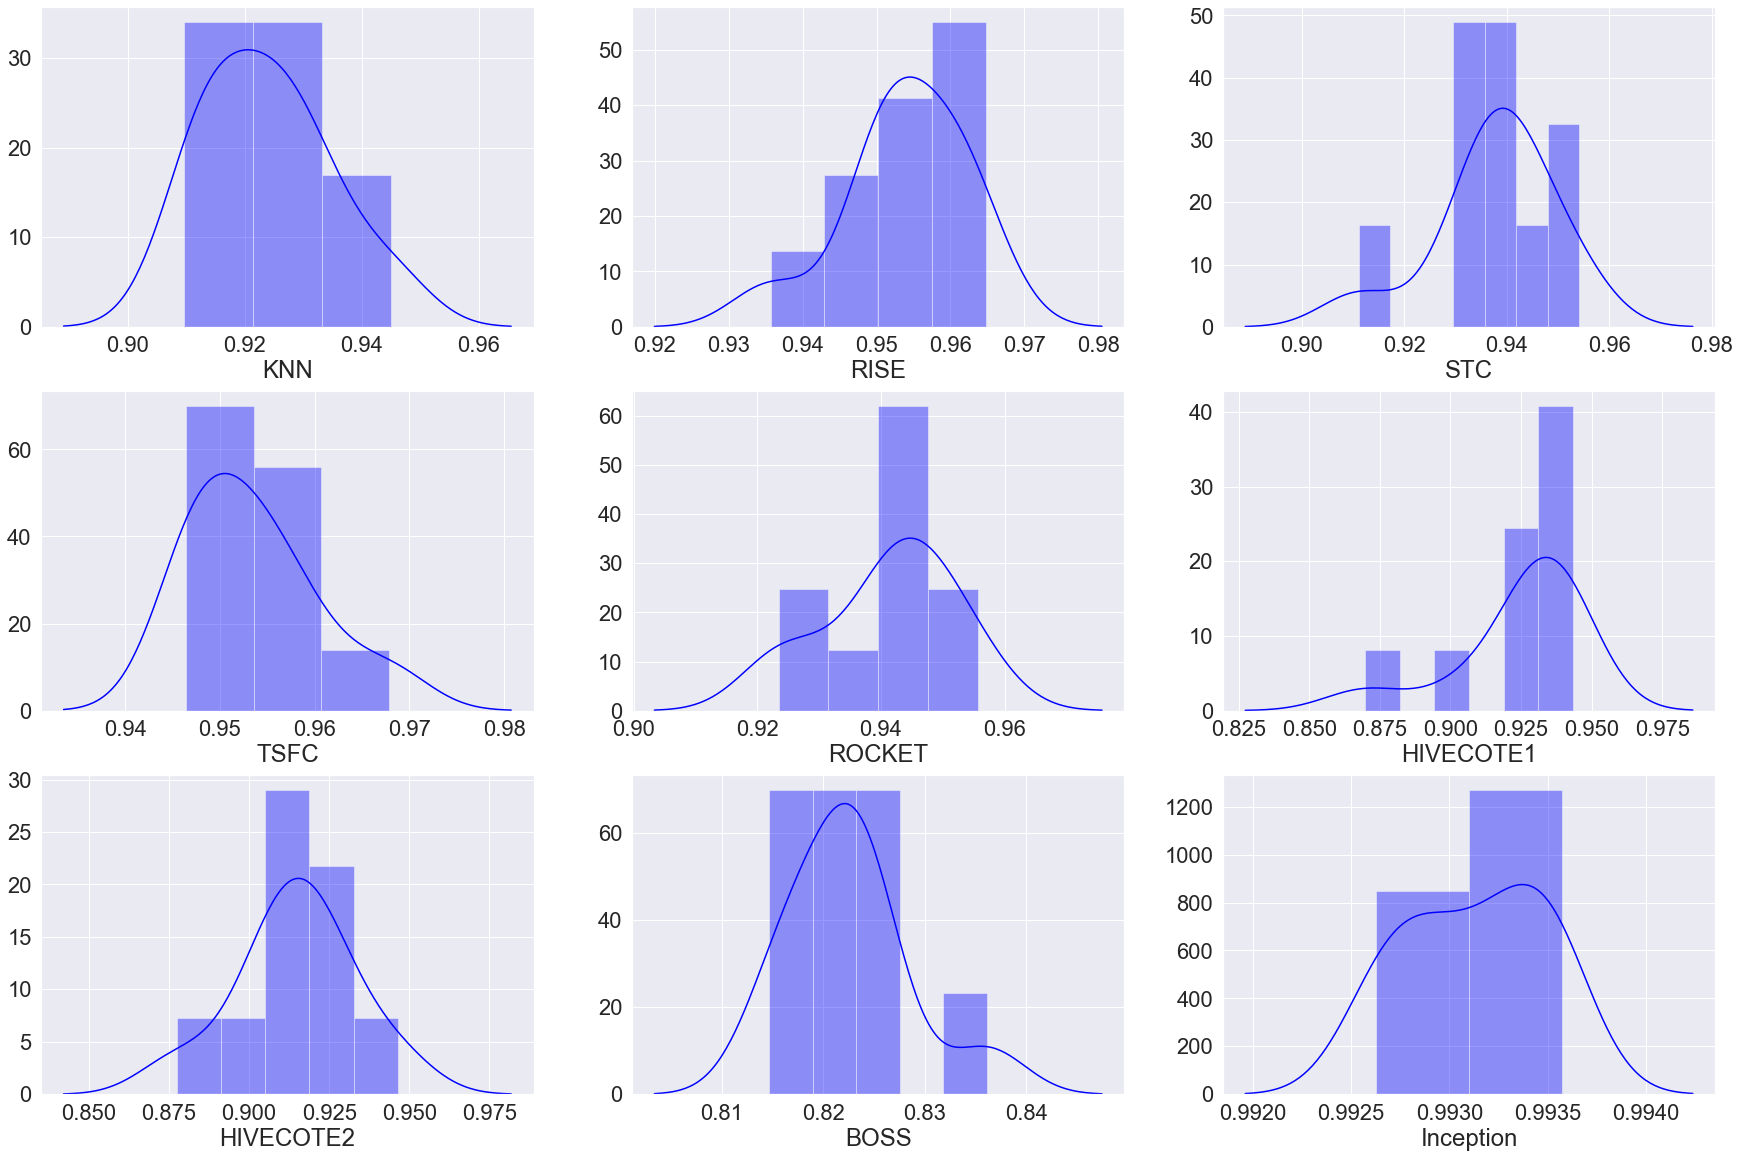

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(30,20))
for col, ax in zip(df.columns, axes.ravel()):
    sns.set(font_scale = 2)
    p = sns.distplot(a=df[col], ax=ax, hist=True, color="blue")
    p.set_ylabel("")
    #ax.set_title(f'Histograma para os dados de {col}')

In [16]:
import statsmodels.api as sm
import pylab

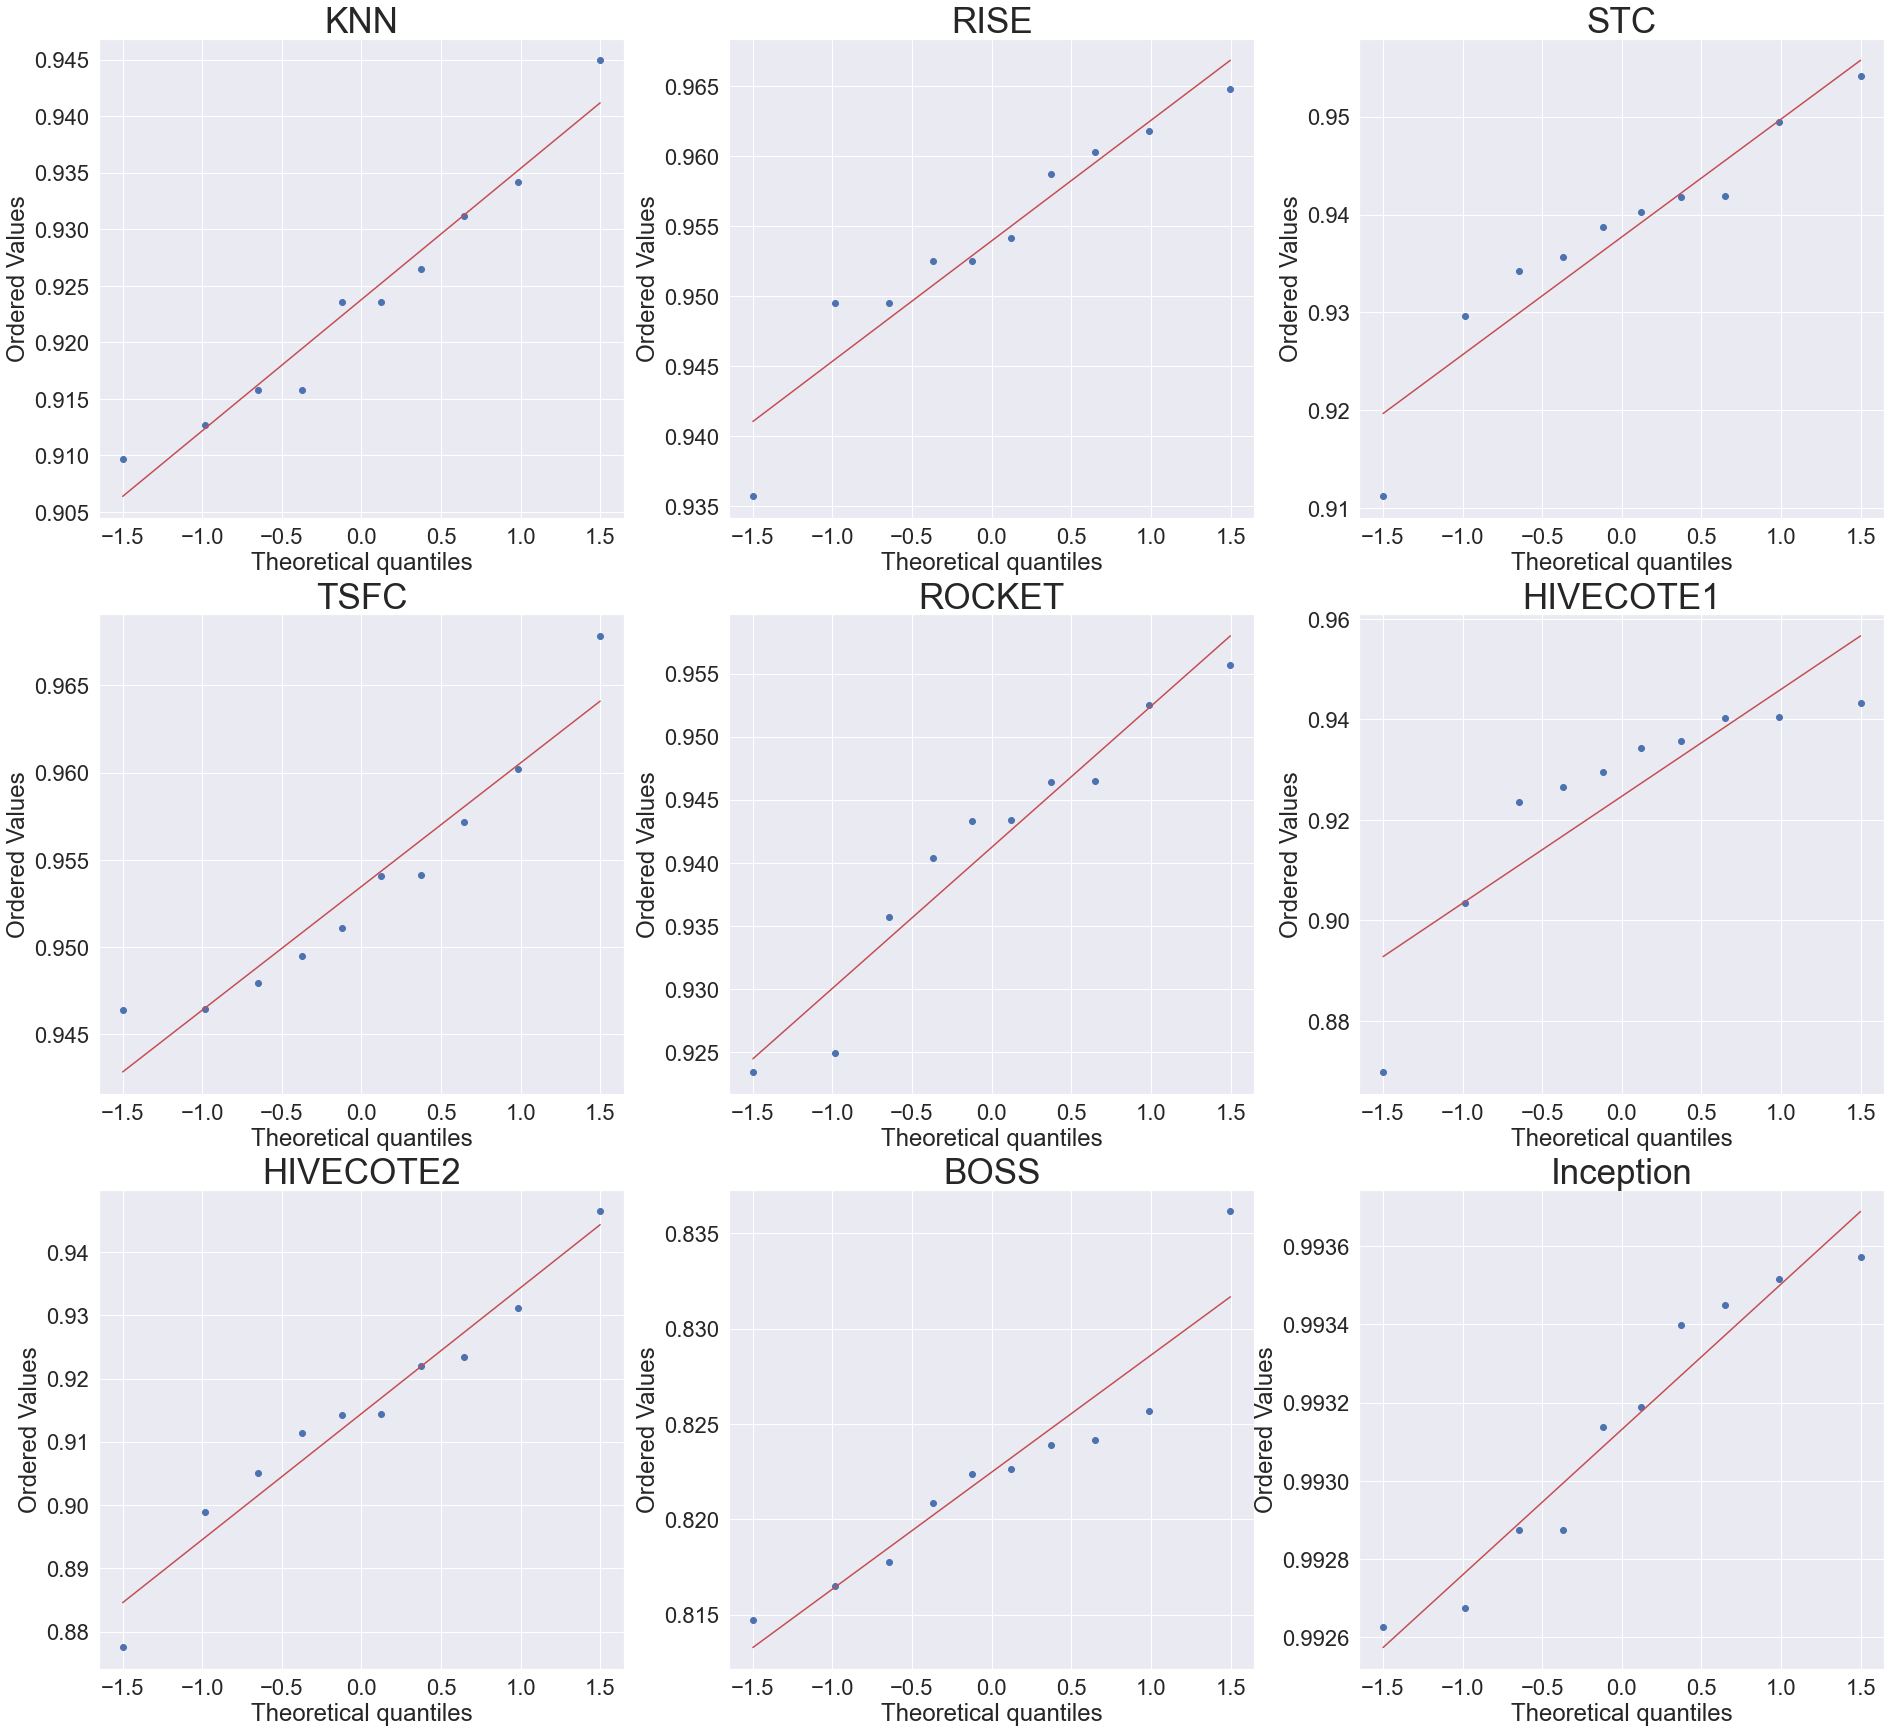

In [37]:
#QQ plot
fig, axes = plt.subplots(3, 3, figsize=(32,30))
for col, ax in zip(df.columns, axes.ravel()):
    stats.probplot(df[col], dist="norm", plot=ax)
    ax.set_title(f'{col}',fontsize=35)
    #ax.set_xlabel("")
plt.show()

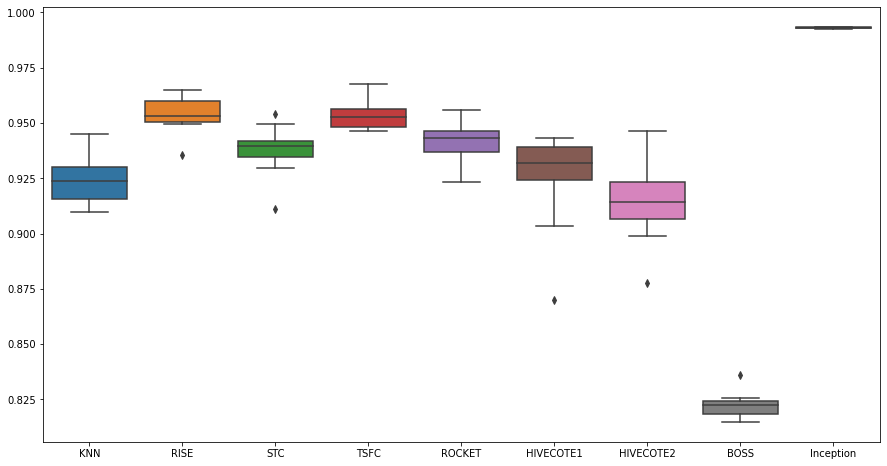

In [18]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.show()

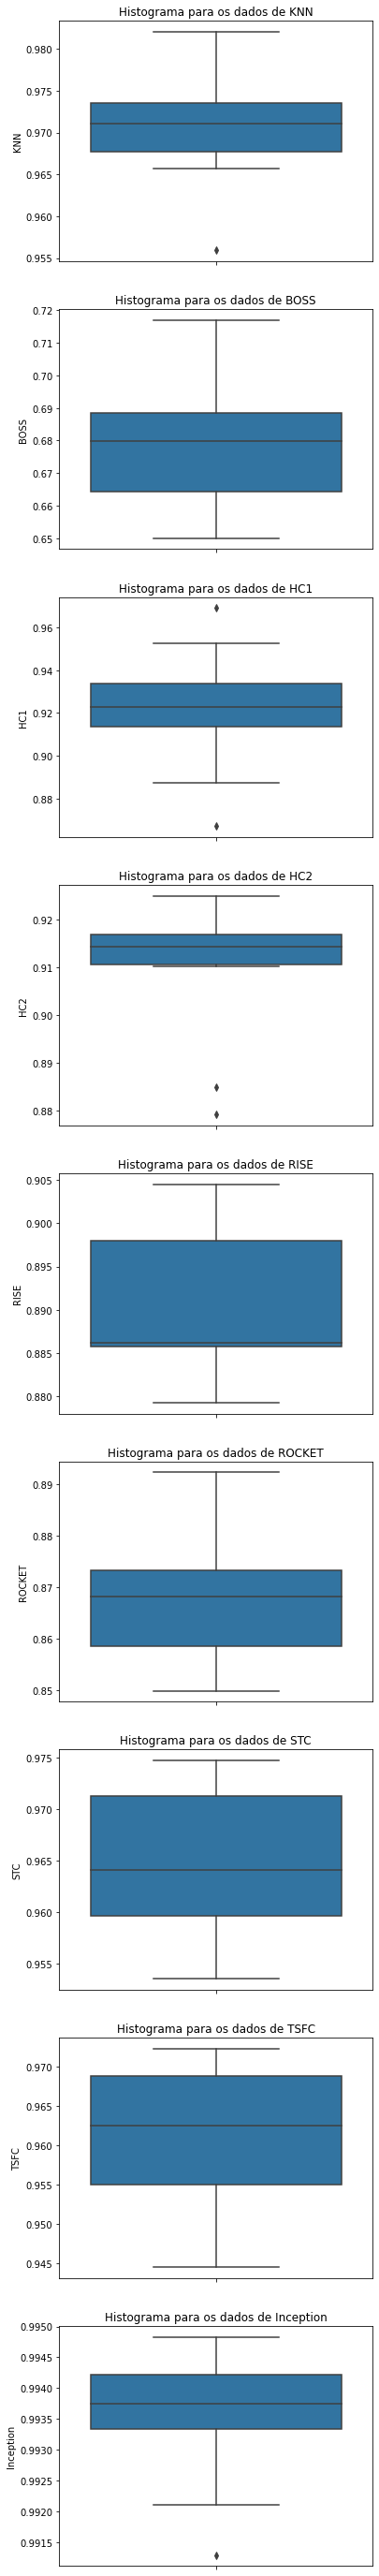

In [68]:
fig, axes = plt.subplots(len(df.columns), figsize=(6,50))
for i, plot in enumerate(df.columns):
    sns.boxplot(data=df, y=df[plot],ax=axes[i])
    axes[i].set_title(f'Histograma para os dados de {plot}')

In [19]:
def normalite_test(df):
    normal = 0
    non_normal = 0
    df_normalite = pd.DataFrame(columns=columns,index=['p_value','statistics'])
    for i, plot in enumerate(df.columns):
#         sns.boxplot(data=df, y=df[plot],ax=axes[i])
        shapiro_stats, shapiro_p_value = stats.shapiro(df[plot])
        df_normalite._set_value('p_value',plot,shapiro_p_value)
        df_normalite._set_value('statistics',plot,shapiro_stats)
        if(show_result(df[plot].mean(), df[plot].std(), plot, shapiro_stats, shapiro_p_value)):
            normal=normal+1;
        else:
            non_normal=non_normal+1;
    return normal, non_normal, df_normalite

In [21]:
normal, non_normal, df_normalite = normalite_test(df)
print(f"Quantidade de valores normais: {normal}, \nQuantidade de valores não normais: {non_normal}")
print(df_normalite)
df_normalite.to_csv(path_or_buf=path+"testeNormalidade.csv")
print("Valores salvos")

Modelo: KNN
A media dos dados eh = 0.9237789831000001
O desvio padrao dos dados eh = 0.010897317045008119
Com 95% de confianca, o valor critico do teste de Kolmogorov-Smirnov eh de = 0.9539369344711304
O valor calculado do teste de Shapiro-Wilk eh de = 0.7151442170143127
Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Shapiro-Wilk

-------------------------------------------------------------------------------------

Modelo: RISE
A media dos dados eh = 0.9539303424
O desvio padrao dos dados eh = 0.008292262672630005
Com 95% de confianca, o valor critico do teste de Kolmogorov-Smirnov eh de = 0.921276867389679
O valor calculado do teste de Shapiro-Wilk eh de = 0.3677275478839874
Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Shapiro-Wilk

-------------------------------------------------------------------------------------

Modelo: STC
A media dos dados eh =

In [25]:
def statical_test(normal, non_normal):
    statistic = 0
    pvalue = 0
    teste = ""
    if(non_normal==0):
        print("Todas as variáveis seguem uma distribuição normal")
        print("Runing ANOVA")
        teste = "ANOVA"
        statistic, pvalue = stats.f_oneway(df['KNN'],df['RISE'],df['STC']
                              ,df['TSFC'],df['ROCKET'],df['HIVECOTE1'],df['HIVECOTE2'],
                              df['BOSS'],df['Inception'])
        
    else:
        print("Pelo menos uma das variáveis não segue distribuição normal")
        print("Runing Kruskal-Wallis")
        teste = "Kruskal-Wallis"
        statistic, pvalue = stats.kruskal(df['KNN'],df['RISE'],df['STC']
                              ,df['TSFC'],df['ROCKET'],df['HIVECOTE1'],df['HIVECOTE2'],
                              df['BOSS'],df['Inception'])
    if pvalue >= MIN_P_VALUE:
        print(f"Com 95% de confianca, não temos evidências para rejeitar a hipótese de que todas os 8 modelos possuem médias relativamente iguais em termos de acurácia de classificação, segundo o teste {teste}")
    else:
        print(f"Com 95% de confianca, temos evidências para rejeitar H0 e aceitar a hipótese de que pelo menos um modelo é diferente dos outros 7 em termos de média de acurácia de classificação, segundo o teste {teste}")
    return statistic, pvalue

In [26]:
print(statical_test(normal, non_normal))

Pelo menos uma das variáveis não segue distribuição normal
Runing Kruskal-Wallis
Com 95% de confianca, temos evidências para rejeitar H0 e aceitar a hipótese de que pelo menos um modelo é diferente dos outros 7 em termos de média de acurácia de classificação, segundo o teste Kruskal-Wallis
(73.95817482667192, 7.972359372471379e-13)


In [28]:
import scikit_posthocs as sp

df_posthoc_nemenyi= sp.posthoc_nemenyi(np.array(df).T)
df_posthoc_nemenyi.columns = columns
df_posthoc_nemenyi

,KNN,RISE,STC,TSFC,ROCKET,HIVECOTE1,HIVECOTE2,BOSS,Inception
1,1.000000,0.206333,0.985503,0.233507,0.921111,0.999997,0.999995,8.399609e-01,3.283183e-03
2,0.206333,1.000000,0.875310,1.000000,0.970570,0.404909,0.077002,3.686901e-04,9.725908e-01
3,0.985503,0.875310,1.000000,0.896784,0.999997,0.998941,0.913482,1.709861e-01,1.569885e-01
4,0.233507,1.000000,0.896784,1.000000,0.978025,0.442489,0.090597,4.939853e-04,9.638327e-01
5,0.921111,0.970570,0.999997,0.978025,1.000000,0.984892,0.750182,6.507156e-02,3.355814e-01
6,0.999997,0.404909,0.998941,0.442489,0.984892,1.000000,0.999276,6.360807e-01,1.395955e-02
7,0.999995,0.077002,0.913482,0.090597,0.750182,0.999276,1.000000,9.613507e-01,5.310148e-04
8,0.839961,0.000369,0.170986,0.000494,0.065072,0.636081,0.961351,1.000000e+00,1.601129e-07
9,0.003283,0.972591,0.156988,0.963833,0.335581,0.013960,0.000531,1.601129e-07,1.000000e+00


In [29]:
columnsDict[9]

'Inception'

In [30]:
for i, row in enumerate(df_posthoc_nemenyi):
    for j, col in enumerate(df_posthoc_nemenyi.columns):
        if i!=j and i>j:
            print(f"Modelo analisado:{col}")
            if(df_posthoc_nemenyi.iloc[i][j]>= MIN_P_VALUE):
                print(f"Com o p_valor {df_posthoc_nemenyi.iloc[i][j]} 95% de confiança,pode ser afirmado que NÃO existe \n uma diferença significativa entre os modelos {col} e {columnsDict[i+1]}")
            else:
                print(f"Com o p_valor {df_posthoc_nemenyi.iloc[i][j]} e 95% de confiança, pode ser afirmado que existe \n uma diferença significativa entre os modelos {col} e {columnsDict[i+1]}")
            print("\n")

Modelo analisado:KNN
Com o p_valor 0.20633327545648966 95% de confiança,pode ser afirmado que NÃO existe 
 uma diferença significativa entre os modelos KNN e RISE


Modelo analisado:KNN
Com o p_valor 0.9855030087065457 95% de confiança,pode ser afirmado que NÃO existe 
 uma diferença significativa entre os modelos KNN e STC


Modelo analisado:RISE
Com o p_valor 0.8753099151648644 95% de confiança,pode ser afirmado que NÃO existe 
 uma diferença significativa entre os modelos RISE e STC


Modelo analisado:KNN
Com o p_valor 0.23350707211088081 95% de confiança,pode ser afirmado que NÃO existe 
 uma diferença significativa entre os modelos KNN e TSFC


Modelo analisado:RISE
Com o p_valor 0.9999999999987422 95% de confiança,pode ser afirmado que NÃO existe 
 uma diferença significativa entre os modelos RISE e TSFC


Modelo analisado:STC
Com o p_valor 0.8967844235336647 95% de confiança,pode ser afirmado que NÃO existe 
 uma diferença significativa entre os modelos STC e TSFC


Modelo anali

C:\Users\mlb\AppData\Local\Temp/ipykernel_20964/604722967.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_posthoc_nemenyi.corr(), dtype=np.bool))


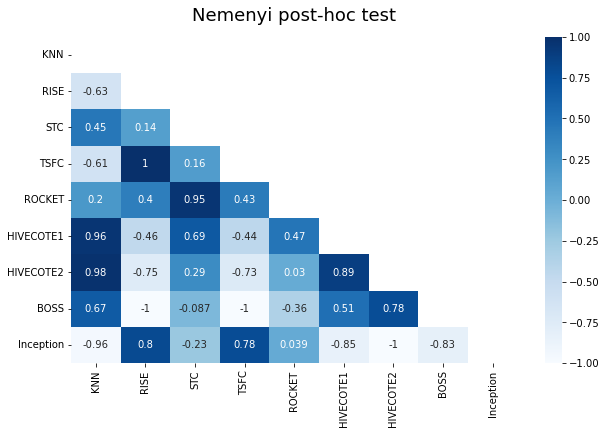

In [31]:
plt.figure(figsize=(10, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_posthoc_nemenyi.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_posthoc_nemenyi.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Nemenyi post-hoc test', fontdict={'fontsize':18}, pad=16);